# Cluster analysis

**Cluster analysis** or **clustering** is the task of *grouping a set of objects* in such a way that objects in the same group (called a *cluster*) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of *exploratory data mining*, and a common technique for statistical data analysis, used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, bioinformatics, data compression, and computer graphics. --- [Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)

**Cluster analysis**，中文常稱**聚類分析**、**群集分析**或**叢集分析**，此目的是把相似的對象分成不同的集群(group)或叢集(cluster)，且同一個叢集中的成員對象都有相似的一些屬性，例如在坐標系空間中彼此有著相對短的空間距離等等。

一般把聚類分析歸納為一種**非監督式學習**(**Unsupervised Learning**)，指的是學習用的資料沒有分類標籤（或未知）、不需要事先以人力輸入標籤(未受監督)，故機器在學習時並不知道其分群結果是否正確。機器僅能從它接受到的輸入資料中，試著從這些資料中找出**潛在的群體結構**。機器會自動依照我們設定的演算法，爬梳出隱含的資料規律，將其資料成員分群。其主要目的在於找出比較相似的資料成員，並將其聚集在一起，形成集群(group)或叢集(cluster)；而相似性的依據，是透過從資料的特徵空間中，定義出資料成員彼此間所謂的「距離」(distance)，相對距離愈近、相似程度越高，更有可能被歸類至同一集群(所謂**物以類聚**)。

<img src="https://i.stack.imgur.com/cIDB3.png" width="800">


非監督式學習在資料探勘中，可被用來探索龐大的客戶群中存在哪些自然群體。在商業應用中，若能為每一個單一客戶都量身打造最適合的行銷策略當然是最好，但現實中你不太可能為龐大客戶群中的每一個人量身打造行銷手法，比較實際的作法是從中找到一個平衡點，也就是找出客戶的群體結構，以建立市場區隔，針對不同的顧客群做行銷。在醫學應用中，群類分析可被用來對癌症患者進行分群，尋找該癌症病人是否有不同的次型態(subtype)，以便針對不同群體對症下藥。因此，聚類分析通常被視為**探索性資料探勘**(**exploratory data mining**)的重要技術。有助於從難以處理的大型、複雜資料集中，分析出各種群體關係。

## K-means clustering

本次實驗將會讓大家練習最常見的聚類分析技術之一：**K-means clustering**。

K-means以空間中k個點為中心進行聚類，對最靠近他們的對象歸類。也就是把樣本中的n個觀察點（或例項）劃分到k個聚類(clusters)中，使得每個點都屬於離他最近的均值（此即聚類中心cluster centroid）所對應的聚類(cluster)。 --- [Wikipedia](k-means clustering)

# 紅酒顧客分群問題

假設你是個酒品經銷商，你想要知道你的顧客群是否有潛在的群體結構，例如，某些人特別喜好氣泡酒、某些人特別喜歡小包裝，若是能依顧客的購買興趣分出群組，你便可以針對不同的群組設計不一樣的宣傳活動，推薦最適合他們的商品。

你了解這是一個**分群問題**，於是你決定利用k-means方法來尋找最佳的客戶分群。

本次資料集來自參考書目中的 *[Data Smart: Using Data Science to Transform Information into Insight](https://www.wiley.com/en-us/Data+Smart%3A+Using+Data+Science+to+Transform+Information+into+Insight-p-9781118661468)*, John, W. Foreman, Wiley, 2014.

## Data loading

首先，我們有兩個關於商品與交易紀錄的資料表，都在`WineKMC.xlsx`檔案中：

1. OfferInformation: 品項、訂單最小量、零售折扣、原產地、是否為適飲期
2. Transactions: 顧客與其購買的商品

對於Excel試算表，我們可以利用 pandas 的 [`read_excel`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html) 函數，將指定的資料表讀取進來。

In [4]:
import pandas as pd

ofn = pd.read_excel("WineKMC.xlsx", sheet_name="OfferInformation", index_col="Offer #")
txn = pd.read_excel("WineKMC.xlsx", sheet_name="Transactions")

## Data preview

先確認一下我們載入的資料表長得是什麼樣子。

首先，Offer資料表的維度和頭5列是：

In [5]:
print("Offers資料表的維度是：", ofn.shape)
print("前5列是：")
ofn.head()

Offers資料表的維度是： (32, 6)
前5列是：


,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
Offer #,,,,,,
1,January,Malbec,72,56,France,False
2,January,Pinot Noir,72,17,France,False
3,February,Espumante,144,32,Oregon,True
4,February,Champagne,72,48,France,True
5,February,Cabernet Sauvignon,144,44,New Zealand,True


Transactions資料表的維度和頭5列是：

In [6]:
# Your code starts here
# Hint: Learn from the example above
print("txn資料表的維度是：", txn.shape)
print("前5列是：")
txn.head()

txn資料表的維度是： (32, 7)
前5列是：


,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


## Data Aggregation

我們的目的是要將客戶分群，而分群的根據即是各自的購買偏好，也就是說我們想將購買偏好相似的客戶們分在一群。

為此，我們在進行clustering之前，必須先整理好可供分析的資料表。對於我們的需求而言，我們需要的是一個「顧客」與其「購買品項」的交叉統計表。其中，顧客為列、品項為欄，表格中的每個值為購買次數。

觀察一下我們手上的資料，看來這個新表格所需的所有資訊都已經在transactions表格中了。我們需要的只是適當的pivoting，便可得到我們想要的新表格。

在此，我們利用上週學過的DataFrame [`pivot_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) method來得到我們需要的新表格，將其取名為`ft`，意即feature table：

In [25]:
# Your code starts here
# Hint: ft = txn.pivot_table(index=?, columns=?, aggfunc=len, fill_value=?)
# Hint: or, pd.crosstab can do the same trick
ft = txn.pivot_table(index="Offer", columns="Varietal", aggfunc=len, fill_value=0)

AttributeError: 'RangeIndex' object has no attribute 'Offer'

In [26]:
print("ft資料表的維度是：", ft.shape)
print("前5列是：")
ft.head()

ft資料表的維度是： (100, 32)
前5列是：


Offer #,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
Customer Last Name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## K-means clustering

有了這張表，我們便可針對顧客的購物偏好進行分群。在此例中，我們要利用[scikit-learn](http://scikit-learn.org/stable/)這個Python機器學習函式庫中的[K-means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)演算法進行clustering。

建立k-means演算法的模型參數需要事先指定群數，我們先猜測顧客們可以被分成4群好了：

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

模型建立後，便可套用到我們的資料集進行學習與分群：

In [56]:
cluster = kmeans.fit_predict(ft)  # Compute cluster centers and predict cluster index for each sample.
cluster

array([3, 1, 2, 3, 1, 1, 2, 3, 0, 3, 0, 2, 3, 0, 0, 2, 1, 2, 3, 1, 3, 1,
       1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 3, 3, 0, 3, 0, 3, 2, 2, 1, 1,
       3, 1, 3, 1, 0, 0, 1, 1, 1, 2, 1, 3, 2, 1, 3, 1, 1, 1, 0, 3, 3, 1,
       2, 1, 0, 1, 1, 1, 1, 3, 1, 3, 2, 1, 1, 1, 1, 0, 1, 2, 3, 3, 3, 0,
       0, 1, 1, 3, 1, 3, 0, 1, 3, 1, 1, 1])

`cluster`變數即是每個顧客被分群後的群組標籤。注意k-means演算法依賴隨機指定初始點(centroid seeds)，所以每次得到的分群標籤可能會有差異。

## Cluster visualization

如何判斷clustering的結果好壞？一個簡單的直觀方法是透過**維度縮減**(dimension reduction)的方式，將多維資料縮減至低維空間，便能比較容易地將其視覺化。

我們在此利用**主成份分析法**([Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis), PCA)將資料的特徵維度縮減成二維空間，便能將資料點(樣本點，即顧客們)用一般的scatter plot方法畫出來，並標出各自分群的組別。（主成份分析法之後會再詳述）

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
ft_2d = pca.fit_transform(ft)

將維度縮減後的樣本於主成份空間的座標與cluster標籤合併成新的資料表：

In [58]:
df = pd.DataFrame(ft_2d, index=ft.index, columns=['pc1', 'pc2'])
df['cluster'] = cluster
df.head()

,pc1,pc2,cluster
Customer Last Name,,,
Adams,1.007580,0.108215,3
Allen,-0.287539,0.044715,1
Anderson,-0.392032,1.038391,2
Bailey,0.699477,-0.022542,3
Baker,0.088183,-0.471695,1


利用[seaborn](https://seaborn.pydata.org/)這個Python資料視覺化的函式庫作圖，我們以[lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)函式，將pc1 & pc2兩個維度，將資料點(顧客)的散佈情形畫出來，並以各自的分群群組上色：

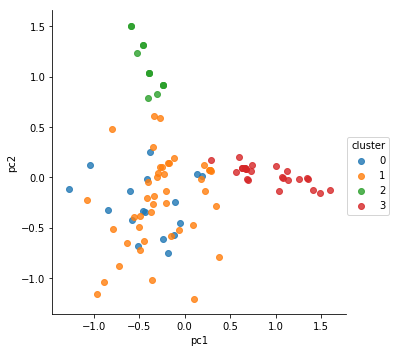

In [59]:
import seaborn as sns

# Your code starts here
# Hint: sns.lmplot(x=?, y=?, data=df, hue=?, fit_reg=False)

從作圖結果看起來，有兩個群形成明顯的獨立群，但是另外兩個群似乎彼此混雜，未有明顯分隔。

## Digging deeper into the clusters

為了了解現有的分群是否具有意義，我們可以更深入探索每一個cluster的顧客群實際的購買偏好。

為此，我們需要每一群顧客購買品項的統計表。我們可以用一系列的資料表操作得到這項資訊。

首先，將cluster資訊與feature table結合，便能以pivot功能算出每群顧客購買品項的統計表：

In [82]:
cluster_txn = pd.concat([df, ft], axis=1).pivot_table(columns='cluster', values=ft.columns, aggfunc=sum)
cluster_txn.head()

cluster,0,1,2,3
1,6,4,0,0
2,3,2,5,0
3,1,5,0,0
4,4,8,0,0
5,1,3,0,0


與商品資訊表結合後，就有機會看出每群顧客的購買偏好：

In [85]:
ofn_cluster_txn = pd.concat([ofn, cluster_txn], axis=1)
ofn_cluster_txn.head()

,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,0,1,2,3
Offer #,,,,,,,,,,
1,January,Malbec,72,56,France,False,6,4,0,0
2,January,Pinot Noir,72,17,France,False,3,2,5,0
3,February,Espumante,144,32,Oregon,True,1,5,0,0
4,February,Champagne,72,48,France,True,4,8,0,0
5,February,Cabernet Sauvignon,144,44,New Zealand,True,1,3,0,0


舉例而言，在我得到的結果中，cluster 2的顧客們很明顯地是[Pinot Noir](https://en.wikipedia.org/wiki/Pinot_noir)(黑皮諾紅酒)的愛好者：

In [99]:
ofn_cluster_txn.sort_values(2, ascending=False).head(10)

,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,0,1,2,3
Offer #,,,,,,,,,,
24,September,Pinot Noir,6,34,Italy,False,0,0,12,0
26,October,Pinot Noir,144,83,Australia,False,2,4,9,0
17,July,Pinot Noir,12,47,Germany,False,0,0,7,0
2,January,Pinot Noir,72,17,France,False,3,2,5,0
31,December,Champagne,72,89,France,False,4,13,0,0
30,December,Malbec,6,54,France,False,6,0,0,16
29,November,Pinot Grigio,6,87,France,False,1,0,0,16
28,November,Cabernet Sauvignon,12,56,France,True,4,1,0,1
27,October,Champagne,72,88,New Zealand,False,1,8,0,0


# Questions

* 你得到的4群顧客群，各自是否有特定的集體購買偏好？其偏好為何？
* 如果一開始設定k-means分成更多群(e.g., k=5, 6, ...)，是否能得到更具意義的顧客分群？請試試看。

Hint: 有時候你可能需要一些domain knowledge才能看出一致性